In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'/content/udemy_courses.csv')

In [3]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [5]:
data.isnull().sum()

,0
course_id,0
course_title,0
url,0
is_paid,0
price,0
num_subscribers,0
num_reviews,0
num_lectures,0
level,0
content_duration,0


In [6]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [7]:
data.duplicated().sum()

np.int64(6)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.select_dtypes(include ='number').skew()

,0
course_id,-0.152931
price,1.157141
num_subscribers,11.600487
num_reviews,17.803799
num_lectures,4.870126
content_duration,5.424793


#Data Visualization and Analysis

In [11]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


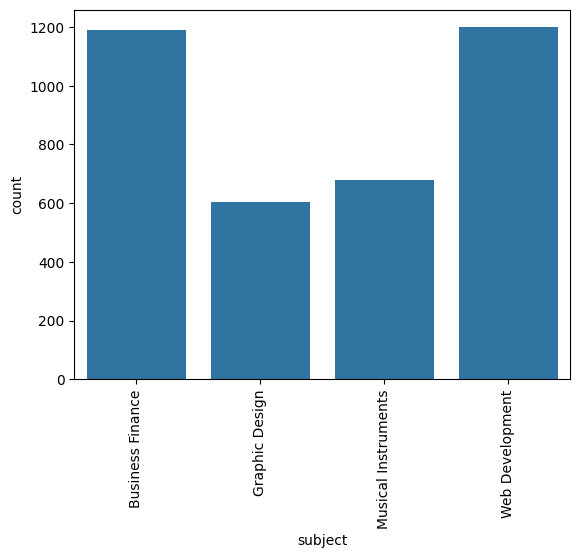

In [12]:
sns.countplot(data = data, x = 'subject')
plt.xticks(rotation = 90)
plt.show()

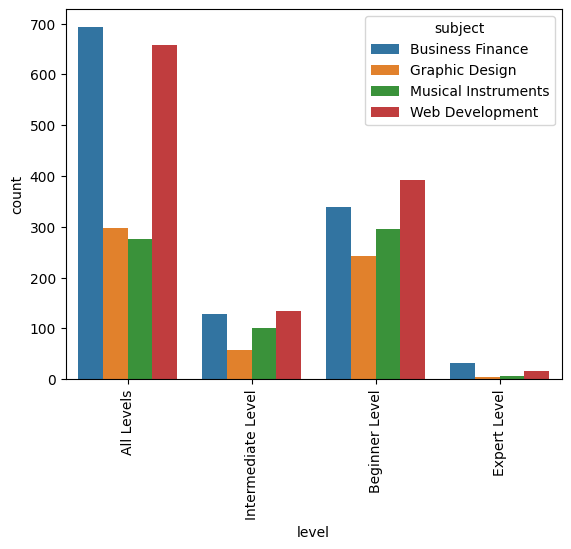

In [13]:
sns.countplot(data = data, x = 'level',hue = 'subject')
plt.xticks(rotation = 90)
plt.show()

Most of the courses are all level and beginner level

In [14]:
data.is_paid.replace({True: 'paid', False: 'unpaid'}, inplace=True)


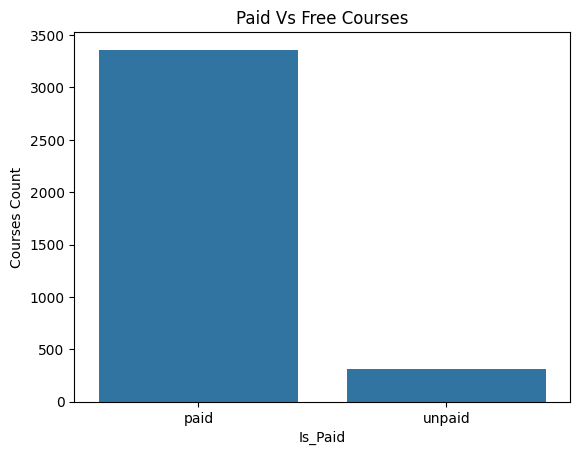

In [15]:

sns.countplot(x='is_paid',data=data)
plt.xlabel('Is_Paid')
plt.ylabel('Courses Count')
plt.title('Paid Vs Free Courses')
plt.show()

Most of the courses are paid courses.

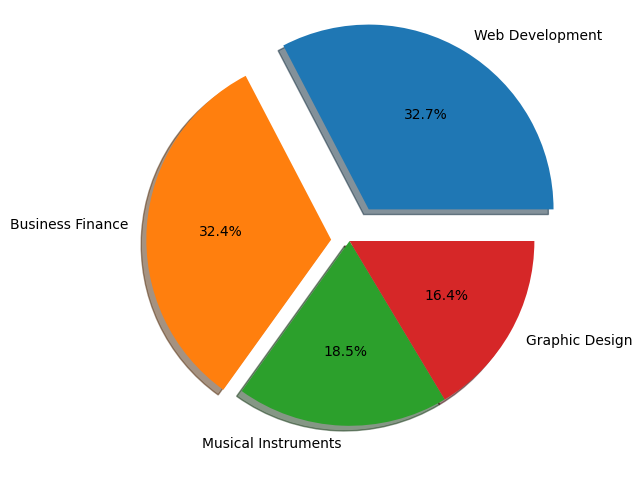

In [16]:
plt.figure(figsize=(8,6))

plt.pie(x=data['subject'].value_counts().values,
        labels=data['subject'].value_counts().index,
        autopct="%.1f%%",
        explode=[.2,.1,0,0],
        shadow=True
       )
plt.show()

Most demand subject is Web Development.


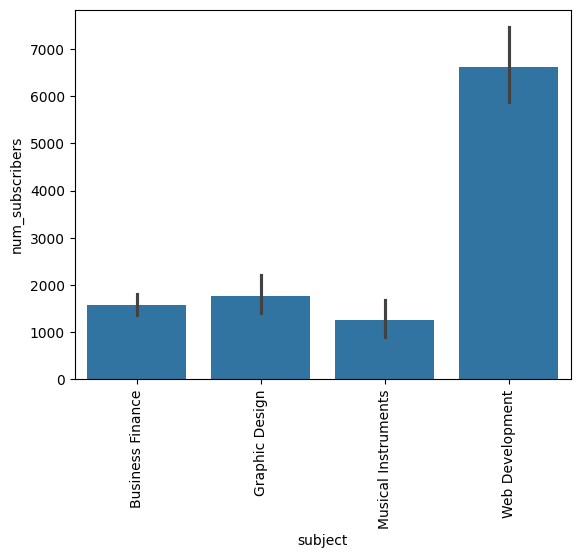

In [17]:
sns.barplot(x='subject',y='num_subscribers',data=data)
plt.xticks(rotation=90)
plt.show()

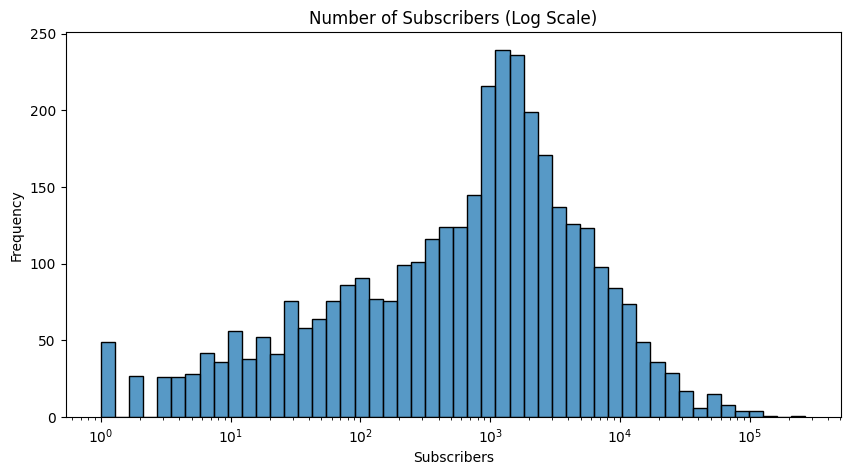

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='num_subscribers', bins=50, log_scale=True)
plt.title('Number of Subscribers (Log Scale)')
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.show()


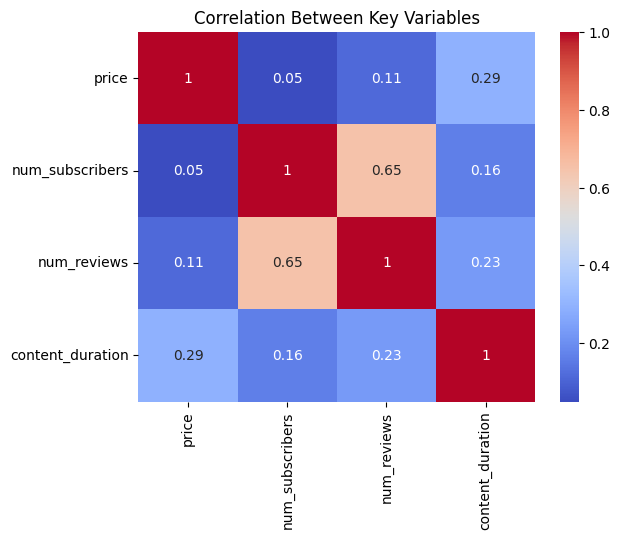

In [19]:
correlation = data[['price', 'num_subscribers', 'num_reviews', 'content_duration']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Key Variables')
plt.show()


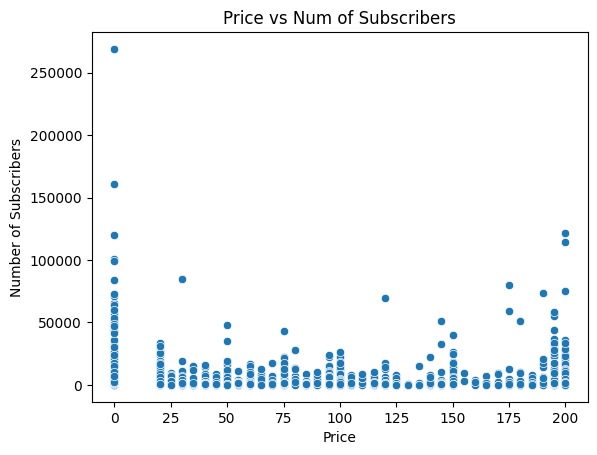

In [20]:
sns.scatterplot(x='price',y='num_subscribers',data=data)
plt.xlabel('Price')
plt.ylabel('Number of Subscribers')
plt.title('Price vs Num of Subscribers')
plt.show()

The scatterplot shows that price doesn't affect the number of subscribers.

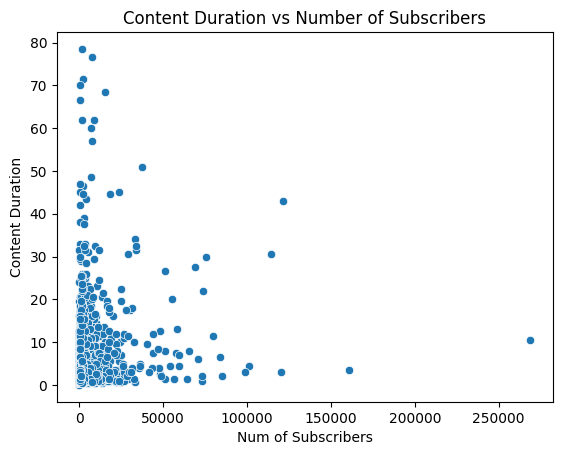

In [21]:
sns.scatterplot(x='num_subscribers',y='content_duration',data=data)
plt.xlabel('Num of Subscribers')
plt.ylabel('Content Duration')
plt.title('Content Duration vs Number of Subscribers')
plt.show()

#Data Insights
* Most of the courses are paid.
* Most of the courses are All Levels and Beginner Level.
* Most Paid and Free Courses are Business Finance and Web Development.
* Course Price Doesn't Affect The Number Of Subscribers.
* Content Duration Doesn't Affect The Number of Subscribers.






#Popularity Based Recommendation System


In [22]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [23]:
def get_popular_courses(df, top_n=10, is_paid=None):
    """
    Calculates popularity score and returns top N popular courses.

    Parameters:
    - df: DataFrame containing Udemy course data
    - top_n: Number of top courses to return (default = 10)
    - is_paid: True for paid, False for free, None for both

    Returns:
    - DataFrame with top N popular courses
    """

    # Calculate popularity score
    df['popularity_score'] = (
        df['num_subscribers'] * 0.6 +
        df['num_reviews'] * 0.4
    )

    # Filter by is_paid if specified
    if is_paid is not None:
        df = df[df['is_paid'] == is_paid]

    # Sort and return top N courses
    df_sorted = df.sort_values(by='popularity_score', ascending=False)
    return df_sorted[['course_title', 'popularity_score']].head(top_n)


In [24]:
# Top 5 paid popular courses
top_paid = get_popular_courses(data, top_n=5, is_paid="paid")
print("Top 5 Paid Popular Courses:")
print(top_paid)

# Top 5 free popular courses
top_free = get_popular_courses(data, top_n=5, is_paid="unpaid")
print("\nTop 5 Free Popular Courses:")
print(top_free)

# Top 5 overall popular courses
top_all = get_popular_courses(data, top_n=5)
print("\nTop 5 Overall Popular Courses (Paid & Free):")
print(top_all)


Top 5 Paid Popular Courses:
                                           course_title  popularity_score
3230                         The Web Developer Bootcamp           83928.4
3232              The Complete Web Developer Course 2.0           77672.0
3247          JavaScript: Understanding the Weird Parts           54557.6
3204  Angular 4 (formerly Angular 2) - The Complete ...           52129.4
2619             Learn Javascript & JQuery From Scratch           52012.2

Top 5 Free Popular Courses:
                                           course_title  popularity_score
2827               Learn HTML5 Programming From Scratch          164805.4
3032                     Coding for Entrepreneurs Basic           96729.0
2783  Build Your First Website in 1 Week with HTML5 ...           74544.2
2589  Web Design for Web Developers: Build Beautiful...           61925.0
1896              Free Beginner Electric Guitar Lessons           61109.2

Top 5 Overall Popular Courses (Paid & Free):
         

##**Content Based Recommendation System.**

In [25]:
data['combined_features'] = data['course_title'] + " " + data['subject']


In [26]:
data['combined_features'] = data['combined_features'].str.lower()


In [27]:
#Convert text to numerical features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])


In [28]:
#Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)


In [29]:
#Create a function to get recommendations
def recommend_courses(title, cosine_sim=cosine_sim):
    # Get index of the given course title
    idx = data[data['course_title'].str.lower() == title.lower()].index[0]

    # Get similarity scores for all courses
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by highest similarity
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top 5 (excluding the course itself)
    top_courses = sim_scores[1:6]

    # Get the course indices
    course_indices = [i[0] for i in top_courses]

    return data[['course_title', 'subject']].iloc[course_indices]


In [30]:
#Test the recommendation system
recommend_courses("Ultimate Investment Banking Course")


,course_title,subject
39,The Complete Investment Banking Course 2017,Business Finance
240,Advanced Accounting for Investment Banking,Business Finance
417,The Investment Banking Recruitment Series,Business Finance
418,Business Banking 101,Business Finance
657,Financial Accounting - The Ultimate Beginner C...,Business Finance
